In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [187]:
df = pd.read_csv('/Users/basharkhaddage/Downloads/train 2.csv')

In [188]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df.iloc[3, 1:].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  28, 247,  17,   0,   0,   0,   

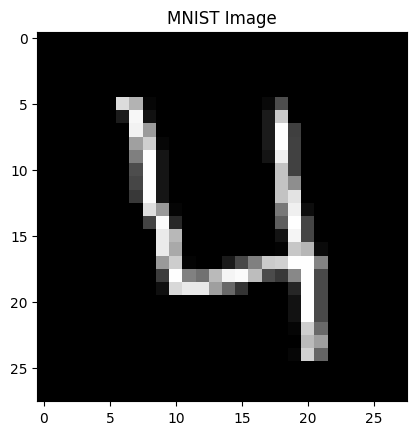

In [190]:
image = df.iloc[3, 1:].to_numpy()
image = image.reshape(28, 28)

plt.imshow(image, cmap='gray')  # cmap='gray' displays the image in grayscale
plt.title('MNIST Image')
plt.show()

In [191]:
df.shape

(42000, 785)

In [192]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'label').to_numpy()
y = df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [194]:
X_train.shape

(33600, 784)

In [195]:
import tensorflow as tf
from tensorflow.keras import layers, models

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation= "relu"),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes for MNIST digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs = 15, validation_data=(X_test, y_test))


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 13, 13, 128)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 5, 5, 64)        

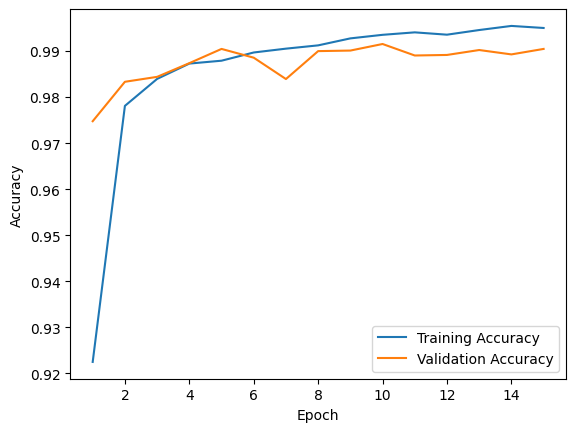

In [196]:
# Extract training accuracy and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy') # Just trying things for x-axis. same thing.
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [197]:
# Training on full dataset now to build our model
# This will be applied on the test set for prediction

In [198]:
X = df.drop(columns = 'label').to_numpy()
y = df['label'].to_numpy()

In [199]:
X.shape

(42000, 784)

In [200]:
# Training all the dataset
X = X.reshape(-1, 28, 28, 1)
X = X / 255.0

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(X, y, epochs = 15)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 13, 13, 128)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 5, 5, 64)        

In [202]:
df_test = pd.read_csv('/Users/basharkhaddage/Downloads/test 2.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
df_test.shape

(28000, 784)

In [204]:
X_test = df_test.to_numpy()
X_test = X_test.reshape(-1, 28, 28, 1)

In [205]:
results = model.predict(X_test)
results = np.argmax(results, axis = 1)

875/875 [==============================] - 18s 20ms/step


In [206]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [207]:
results = pd.Series(results, name = "label")
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: label, Length: 28000, dtype: int64

In [208]:
image_id = pd.Series(np.arange(1, 28001), name = 'ImageId')
image_id

0            1
1            2
2            3
3            4
4            5
         ...  
27995    27996
27996    27997
27997    27998
27998    27999
27999    28000
Name: ImageId, Length: 28000, dtype: int64

In [209]:
df_digit_recognizer = pd.concat([image_id, results], axis = 1)
df_digit_recognizer.rename(columns = {'label':'Label'}, inplace = True)

In [210]:
df_digit_recognizer

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [211]:
import pandas as pd
import os

file_name = 'Kaggle_Digit_Recognizer_3.csv'
current_directory = os.getcwd()

file_path = os.path.join(current_directory, file_name)
df_digit_recognizer.to_csv(file_path, index=False)

print(f"CSV file saved at: {file_path}")

CSV file saved at: /Users/basharkhaddage/Desktop/TutorT/ML Models/Kaggle_Digit_Recognizer_3.csv


In [212]:
current_directory

'/Users/basharkhaddage/Desktop/TutorT/ML Models'

In [213]:
file_name

'Kaggle_Digit_Recognizer_3.csv'